In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import optimize
%matplotlib qt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('../data/covidworld.csv')
df = df.drop('SNo', axis=1)
df['Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [3]:
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt
    
def sir(x, beta, gamma):
    I0, R0 = 1, 0
    S0 = N - I0 - R0
    t = np.linspace(0, 200, 1000)
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(beta, gamma))
    S, I, R = ret.T
    return np.interp(x, t, I)

In [4]:
def forecast(country_name):
    data = df[(df['Country/Region'] == country_name)]
    gb = data.groupby('ObservationDate')
    country = gb.sum()
    country = country.reset_index()
    infected = country['Infected']
    print(infected.tail())
    recovered = country['Recovered']
    plt.scatter(np.arange(0, infected.size, 1), infected, label='infected test', color='crimson', s=12) 
    #plt.scatter(np.arange(0, recovered.size, 1), recovered, label='recovered test', color='crimson', s=12) 

    y_data = infected
    x_data = np.arange(0, y_data.size, 1)
    plt.scatter(x_data, y_data, label='infected train', color='royalblue', s=12) 

    params, params_covariance = optimize.curve_fit(sir, x_data, y_data, p0=[1,1])
    x_data = np.linspace(0, 80, 500)
    I0, R0 = 1, 0
    S0 = N - I0 - R0
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, x_data, args=(params[0], params[1]))
    S, I, R = ret.T

    plt.plot(x_data, I, label='infected fit', color='black')
    plt.ylabel('number of infected persons')
    plt.xlabel('days')
    plt.legend()
    plt.show()
    plt.savefig('images/sir_'+country_name+'.png', dpi=400)

34    1151.0
35    1306.0
36     827.0
37     995.0
38    1178.0
Name: Infected, dtype: float64


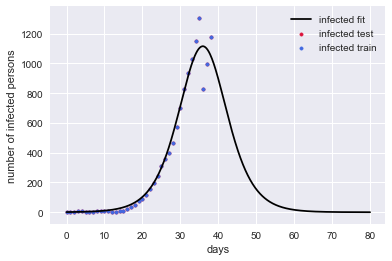

<Figure size 432x288 with 0 Axes>

In [5]:
N = 120e6
forecast('Mexico')

60    72084.0
61    74974.0
62    77488.0
63    80002.0
64    80925.0
Name: Infected, dtype: float64


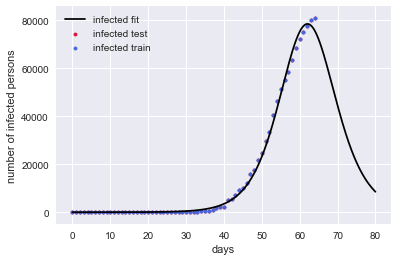

<Figure size 432x288 with 0 Axes>

In [6]:
N = 44.6e6
forecast('Spain')

61    80572.0
62    83049.0
63    85388.0
64    88274.0
65    91246.0
Name: Infected, dtype: float64


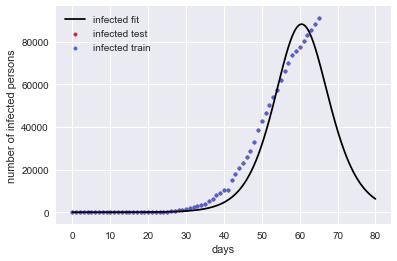

<Figure size 432x288 with 0 Axes>

In [7]:
N = 60.48e6
forecast('Italy')

In [28]:
y = np.array([1,2,3])
y = np.append(y,1)
print(y)

[1 2 3 1]
